### Em quais estados há mais instabilidade de preços?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\digital college\DA18\PYTHON\Projeto_Unidade_3\_5_Dataframes_tratados\dados_completos.csv')


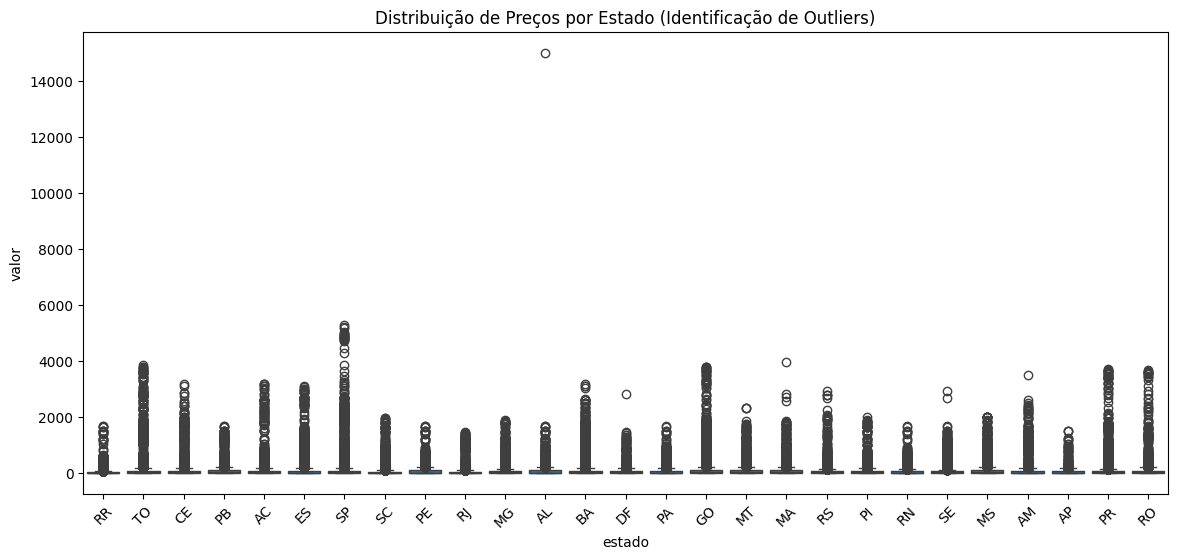

Estados com maior instabilidade de preços (CV):
               mean         std          cv
estado                                    
SP       97.558912  363.805910  372.908946
PR       69.626750  238.377988  342.365525
TO      110.596486  362.412800  327.689254
AC       80.849485  260.527999  322.238293
RO       86.033257  261.748485  304.241053
Estados com mais outliers em 2022:
 estado
ES    161
GO    125
MS    122
CE    117
AL    106
SP    104
BA    104
PB    101
PR     99
TO     98
MT     88
SC     87
DF     87
PA     85
MA     83
AM     79
MG     72
PE     72
RO     69
AC     63
RJ     61
PI     60
RN     60
SE     53
RR     45
RS     31
AP     20
dtype: int64


In [ ]:

# Identificação de outliers por estado
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='estado', y='valor')
plt.title('Distribuição de Preços por Estado (Identificação de Outliers)')
plt.xticks(rotation=45)
plt.show()

# Cálculo de coeficiente de variação por estado
cv_estado = df.groupby('estado')['valor'].agg(['mean', 'std'])
cv_estado['cv'] = (cv_estado['std'] / cv_estado['mean']) * 100
cv_estado = cv_estado.sort_values('cv', ascending=False)

print("Estados com maior instabilidade de preços (CV):\n", cv_estado.head())

# Análise temporal de outliers
def identificar_outliers_estado(ano, mes=None):
    temp = df[df['ano'] == ano]
    if mes:
        temp = temp[temp['mes'] == mes]
    
    # Calculando limites para outliers
    Q1 = temp['valor'].quantile(0.25)
    Q3 = temp['valor'].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = temp[(temp['valor'] < limite_inferior) | (temp['valor'] > limite_superior)]
    return outliers.groupby('estado').size().sort_values(ascending=False)

# Exemplo:
outliers_2022 = identificar_outliers_estado(2022)
print("Estados com mais outliers em 2022:\n", outliers_2022)